In [85]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import scienceplots
%matplotlib inline

import sys
sys.path.append("../../../src")

import nanonets_utils

data_folderA = "/home/jonas/phd/data/controls_setupA/"
data_folderB = "/home/jonas/phd/data/controls_setupB/"

In [29]:
# Parameter
N_valsA = [6,8,10,12]
N_keysA = len(N_valsA)
N_valsB = [4,6,8,10,12]
N_keysB = len(N_valsB)
N_np    = 7

# Boolean On and Off
off_statesA = np.array(N_keysA*[0.0])
off_statesB = np.array(N_keysB*[0.0])
on_statesA  = np.array(N_keysA*[0.01])
on_statesB  = np.array(N_keysB*[0.01])

# Current Conditions
min_error   = 0.0
max_error   = 0.5
min_current = 0.0

dataA, data_ncA = nanonets_utils.get_boolean_data(data_folderA, N=N_np, N_e=N_valsA, off_state=off_statesA, on_state=on_statesA,
                                                    min_currents=min_current, min_error=min_error, max_error=max_error, i1_col=1, i2_col=2)
dataB, data_ncB = nanonets_utils.get_boolean_data(data_folderB, N=N_np, N_e=N_valsB, off_state=off_statesB, on_state=on_statesB,
                                                    min_currents=min_current, min_error=min_error, max_error=max_error, i1_col=1, i2_col=2)

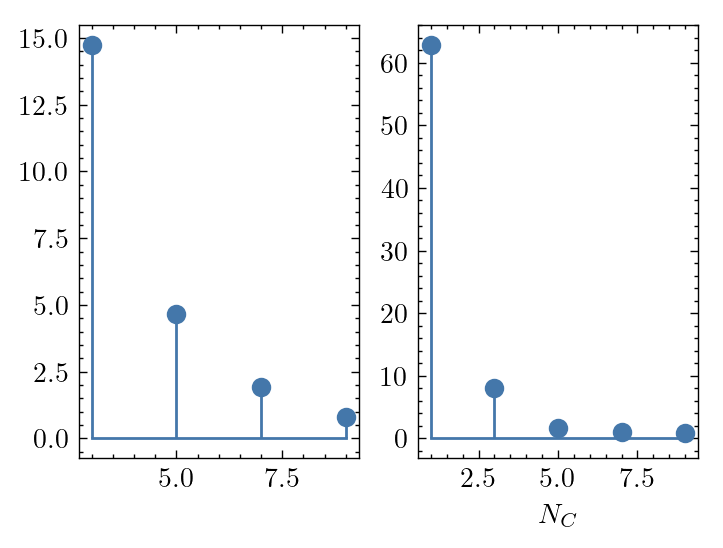

In [16]:
p_deletedA = np.array([len(data_ncA[N])/(len(dataA[N])+len(data_ncA[N])) for N in N_valsA])
p_deletedB = np.array([len(data_ncB[N])/(len(dataB[N])+len(data_ncB[N])) for N in N_valsB])

with plt.style.context(["science","bright"]):

    fig = plt.figure(dpi=200, layout='constrained')
    ax  = fig.add_subplot(1,2,1)
    ax.stem(np.array(N_valsA)-3, p_deletedA*100, basefmt='')
    
    ax  = fig.add_subplot(1,2,2)
    ax.stem(np.array(N_valsB)-3, p_deletedB*100, basefmt='')

    ax.set_xlabel("$N_{C}$")

## Fitness Abundance

In [17]:
gates       = ['AND','OR','XOR','NAND','NOR','XNOR']
delta       = 0.0
bins        = 0
fitnessA    = {N : nanonets_utils.fitness(df=dataA[N], N_controls=(N-3), delta=delta, off_state=off_statesA[i], on_state=on_statesA[i], gates=gates) for i, N in enumerate(N_valsA)}
fitnessB    = {N : nanonets_utils.fitness(df=dataB[N], N_controls=(N-3), delta=delta, off_state=off_statesB[i], on_state=on_statesB[i], gates=gates) for i, N in enumerate(N_valsB)}

abundanceA  = {N : nanonets_utils.abundance(df=fitnessA[N], bins=bins) for N in N_valsA}
abundanceB  = {N : nanonets_utils.abundance(df=fitnessB[N], bins=bins) for N in N_valsB}

In [164]:
fitness = pd.DataFrame()

for j, N in enumerate(N_valsA): 

    df          = pd.melt(fitnessA[N].loc[:,'AND Fitness':], var_name='Gate', value_name='Fitness')
    df['key']   = f'A{N-3}'
    fitness     = pd.concat([fitness, df], ignore_index=True)

for j, N in enumerate(N_valsB[::-1][1:-1]):
    
    df          = pd.melt(fitnessB[N].loc[:,'AND Fitness':], var_name='Gate', value_name='Fitness')
    df['key']   = f'B{N-3}'
    fitness     = pd.concat([fitness, df], ignore_index=True)

,Gate,Fitness,key
0,AND Fitness,2.869185,A3
1,AND Fitness,4.226185,A3
2,AND Fitness,-2.185245,A3
3,AND Fitness,2.446120,A3
4,AND Fitness,3.320409,A3
...,...,...,...
800707,XNOR Fitness,-1.267947,B3
800708,XNOR Fitness,-4.567140,B3
800709,XNOR Fitness,1.742224,B3
800710,XNOR Fitness,-0.383041,B3


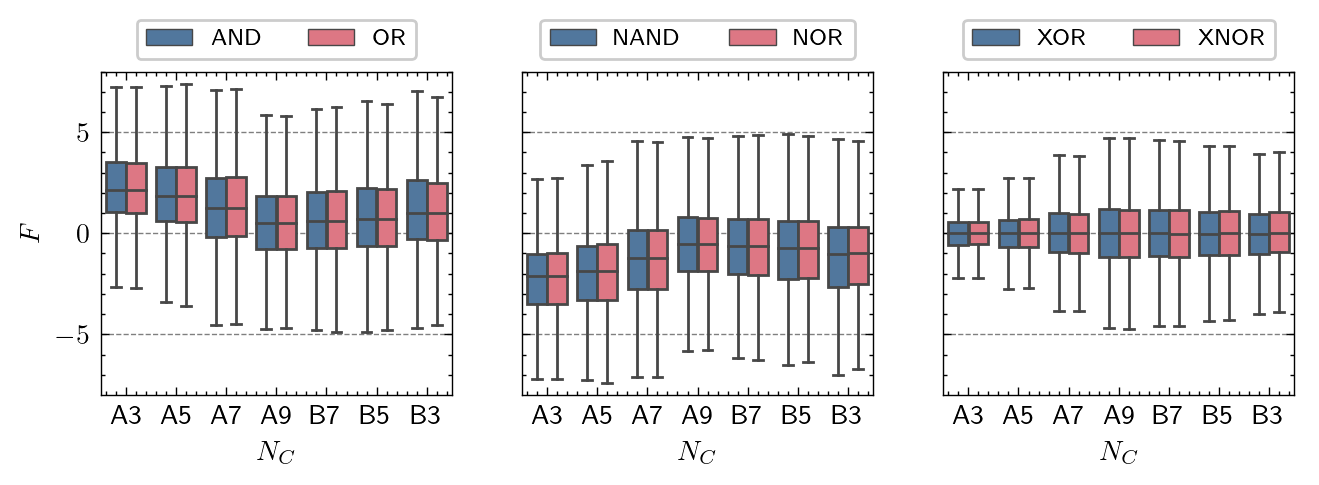

In [170]:
with plt.style.context(["science","bright", "grid"]):
    
    fig = plt.figure(dpi=200)
    fig.set_figwidth(fig.get_figwidth()*2.2)
    fig.set_figheight(fig.get_figheight()*0.8)

    ax  = fig.add_subplot(1,3,1)
    ax  = sns.boxplot(fitness[(fitness['Gate']=='AND Fitness') | (fitness['Gate']=='OR Fitness')], x='key', y='Fitness', hue='Gate', ax=ax, fliersize=0)
    ax.set_ylim(-8,8)
    ax.set_ylabel("$F$")
    ax.set_xlabel("$N_C$")
    l = ax.legend(title='', bbox_to_anchor=(0.5,1.1), loc='center', fontsize='small', ncol=2)
    l.get_texts()[0].set_text('AND')
    l.get_texts()[1].set_text('OR')

    ax  = fig.add_subplot(1,3,2)
    ax  = sns.boxplot(fitness[(fitness['Gate']=='NAND Fitness') | (fitness['Gate']=='NOR Fitness')], x='key', y='Fitness', hue='Gate', ax=ax, fliersize=0)
    ax.set_ylim(-8,8)
    ax.set_yticklabels("")
    ax.set_ylabel("")
    ax.set_xlabel("$N_C$")
    l = ax.legend(title='', bbox_to_anchor=(0.5,1.1), loc='center', fontsize='small', ncol=2)
    l.get_texts()[0].set_text('NAND')
    l.get_texts()[1].set_text('NOR')

    ax  = fig.add_subplot(1,3,3)
    ax  = sns.boxplot(fitness[(fitness['Gate']=='XOR Fitness') | (fitness['Gate']=='XNOR Fitness')], x='key', y='Fitness', hue='Gate', ax=ax, fliersize=0)
    ax.set_ylim(-8,8)
    ax.set_yticklabels("")
    ax.set_ylabel("")
    ax.set_xlabel("$N_C$")
    l = ax.legend(title='', bbox_to_anchor=(0.5,1.1), loc='center', fontsize='small', ncol=2)
    l.get_texts()[0].set_text('XOR')
    l.get_texts()[1].set_text('XNOR')

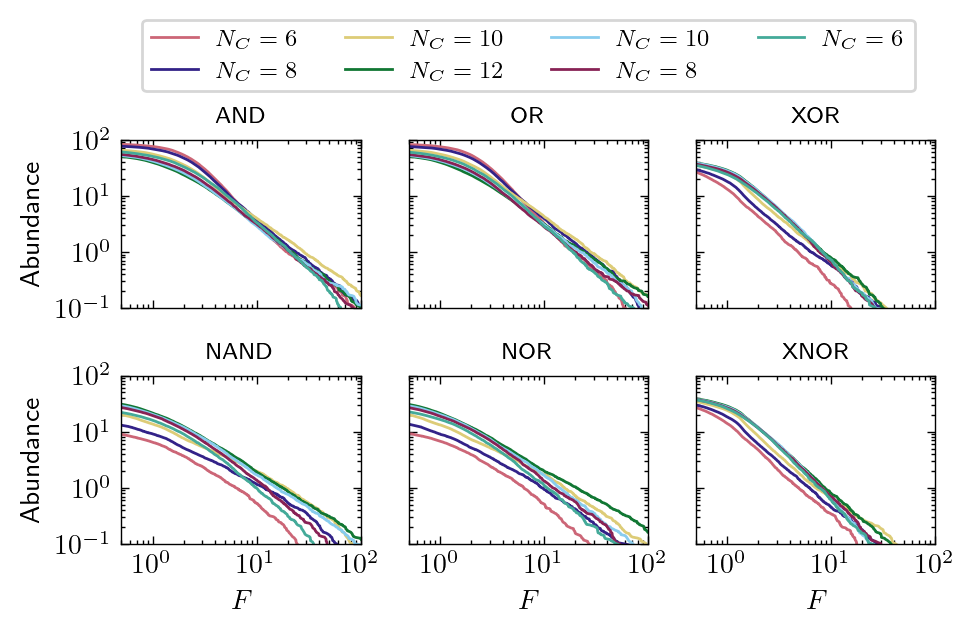

In [171]:
cmap_c  = 'inferno'
cmap    = plt.get_cmap(cmap_c)
nrows   = 2
ncols   = 3

with plt.style.context(["science","muted"]):

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, dpi=200)
    fig.set_figwidth(fig.get_figwidth()*1.5)

    for i, gate in enumerate(gates):

        ax  = axes.flat[i]

        for j, N in enumerate(N_valsA):

            df  = abundanceA[N]
            ax.plot(df[f'{gate} Fitness'], df[f'{gate} Fitness Abundance'], label=f'$N_C = {N}$')

        for j, N in enumerate(N_valsB[::-1][1:-1]):

            df  = abundanceB[N]
            ax.plot(df[f'{gate} Fitness'], df[f'{gate} Fitness Abundance'], label=f'$N_C = {N}$')

        ax.set_xlim(0.5,100)
        ax.set_ylim(0.1,100)
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.set_title(gate, fontsize='small')
        
        if i % ncols == 0:
            ax.set_ylabel('Abundance')
        else:
            ax.set_yticklabels("")
        
        if i >= (nrows-1)*ncols:
            ax.set_xlabel('$F$')
        else:
            ax.set_xticklabels("")
        
        if i == 0:
            ax.legend(fontsize='small', bbox_to_anchor=(1.7,1.5), loc='center', ncols=4, frameon=True)
        
        fig.subplots_adjust(hspace=0.4)